In [75]:
library(ape)
library(sitePath)
# library(tibble)
library(ggplot2)
library(ggrepel)
suppressPackageStartupMessages(library(treeio))
suppressPackageStartupMessages(library(ggtree))

PLOTS_DIR <- "Plots"

PATH_SNP_PROP <- 0.025

In [4]:
data(h3n2_align)
data(h3n2_tree)

tree <- addMSA(h3n2_tree, alignment = h3n2_align)

In [5]:
align <- attr(tree, "align")
names(align) <- tree[["tip.label"]]

In [6]:
sites <- seq_len(nchar(align[1]))
names(sites) <- sites

In [90]:
nTips <- length(tree[["tip.label"]])

In [7]:
majorSNP <- sapply(sites, function(s) {
    aaSummary <- sitePath:::tableAA(align, s - 1)
    gapIndex <- which(names(aaSummary) == '-')
    if (length(gapIndex) != 0) {
        aaSummary <- aaSummary[-gapIndex]
    }
    names(aaSummary)[which.max(aaSummary)]
})

In [38]:
snpColors <- lapply(sitePath:::AA_FULL_NAMES, function(i) {
    sitePath:::AA_COLORS[[i]]
})
names(snpColors) <- toupper(names(snpColors))

In [97]:
allSNP <- lapply(names(align), function(ac) {
    seq <- align[[ac]]
    res <- as.data.frame(t(sapply(names(majorSNP), function(site) {
        s <- as.integer(site)
        snp <- substr(seq, s, s)
        if (snp != majorSNP[[site]] && snp != '-') {
            return(c(site, snp))
        } else {
            return(c(site, NA_character_))
        }
    })))
    res <- res[complete.cases(res), ]
    colnames(res) <- c("Pos", "SNP")
    res[["Pos"]] <- as.integer(res[["Pos"]])
    res[["Accession"]] <- ac
    res
})
allSNP <- do.call(rbind, allSNP)
allSNP <- allSNP[, c(3, 1, 2)]
allSNP[["color"]] <- as.character(snpColors[allSNP[, "SNP"]])

snpSummary <- as.data.frame(table(allSNP[["Pos"]], allSNP[["SNP"]]))

allSNP <- merge(
    x = allSNP, 
    y = snpSummary, 
    by.x = c("Pos", "SNP"),
    by.y = c("Var1", "Var2"),
    all.x = TRUE
)

In [126]:
snp_data <- allSNP[which(allSNP[, "Freq"] >= nTips * PATH_SNP_PROP), c(3, 1, 2, 4)]

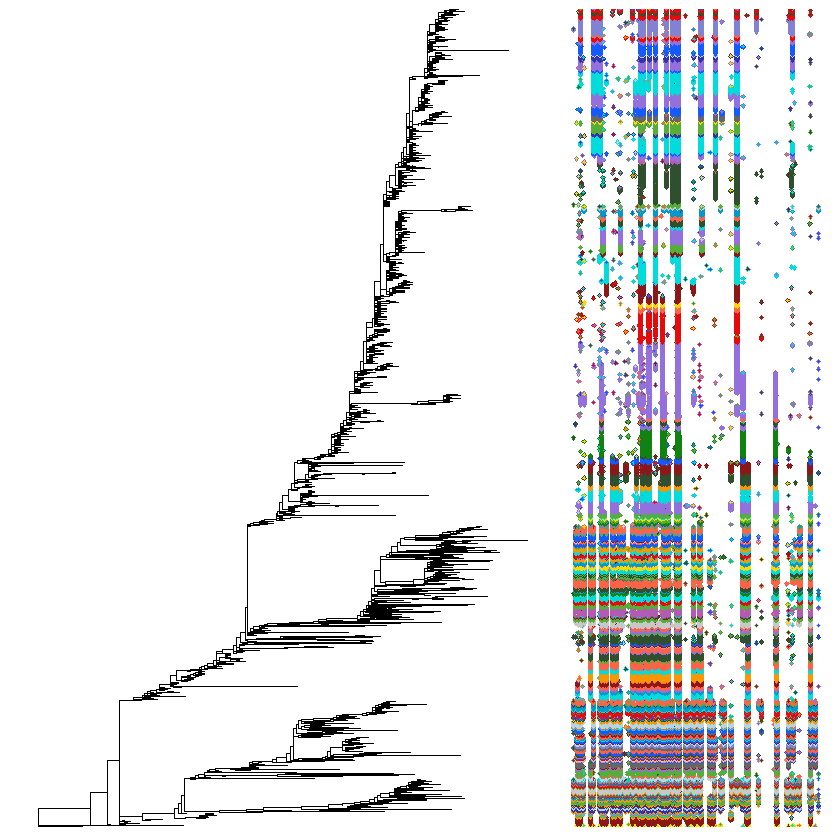

In [131]:
p <- ggtree(tree) +
    geom_facet(
        panel = "SNP",
        data = snp_data,
        geom = geom_point,
        mapping = aes(x = Pos, fill = SNP),
        shape = 23,
        size = 1,
        stroke = 0,
        color = snp_data[["color"]]
    ) +
    scale_fill_manual(values = snpColors) +
    theme(
        strip.background = element_blank(),
        strip.text.x = element_blank(),
        legend.position = "none"
    )
p <- facet_widths(p, widths = c(2, 1))

print(p)

In [132]:
ggsave(
    filename = file.path(PLOTS_DIR, "snpTree.svg"),
    plot = p, 
    device = "svg",
    width = 18,
    height = 18
)

In [73]:
paths <- lineagePath(tree, PATH_SNP_PROP)

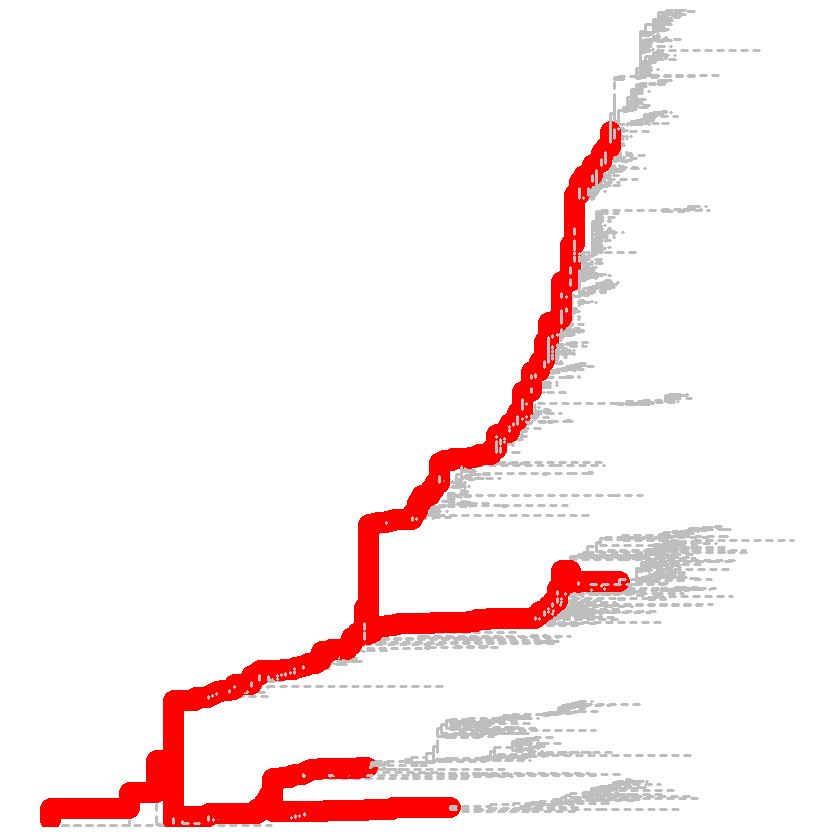

In [133]:
attr(tree, "group") <- rep(1, times = Ntip(tree) + tree$Nnode)
attr(tree, "group")[unique(unlist(paths))] <- 0
attr(tree, "group") <- factor(attr(tree, "group"))

attr(tree, "size") <- rep(0.01, times = Ntip(tree) + tree$Nnode)
attr(tree, "size")[unique(unlist(paths))] <- 0.5

p <- ggtree(tree, aes(color=group, linetype=group, size=size)) + 
    scale_color_manual(values = c("red", "grey")) + 
    theme(legend.position = "none")
p

In [134]:
ggsave(
    filename = file.path(PLOTS_DIR, "lineages.svg"),
    plot = p, 
    device = "svg",
    width = 12,
    height = 18
)

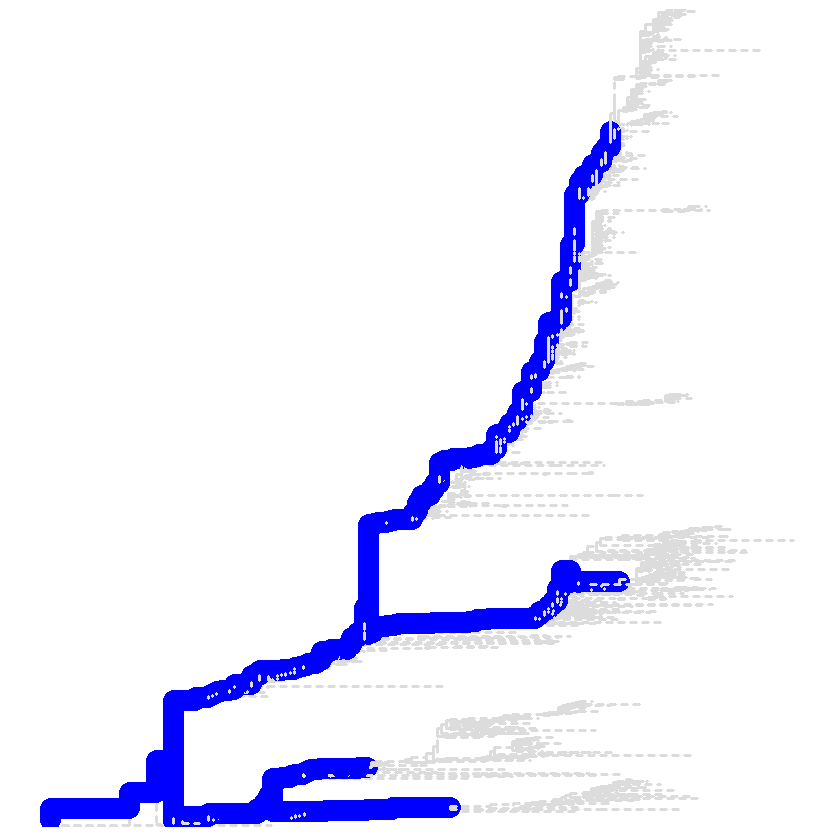

In [49]:
p <- ggtree(tree, aes(color=group, linetype=group, size=size)) + 
    scale_color_manual(values = c("blue", "gainsboro")) + 
    theme(legend.position = "none")
p

In [50]:
ggsave(
    filename = file.path(PLOTS_DIR, "pathway0.svg"),
    plot = p, 
    device = "svg",
    width = 10,
    height = 12
)

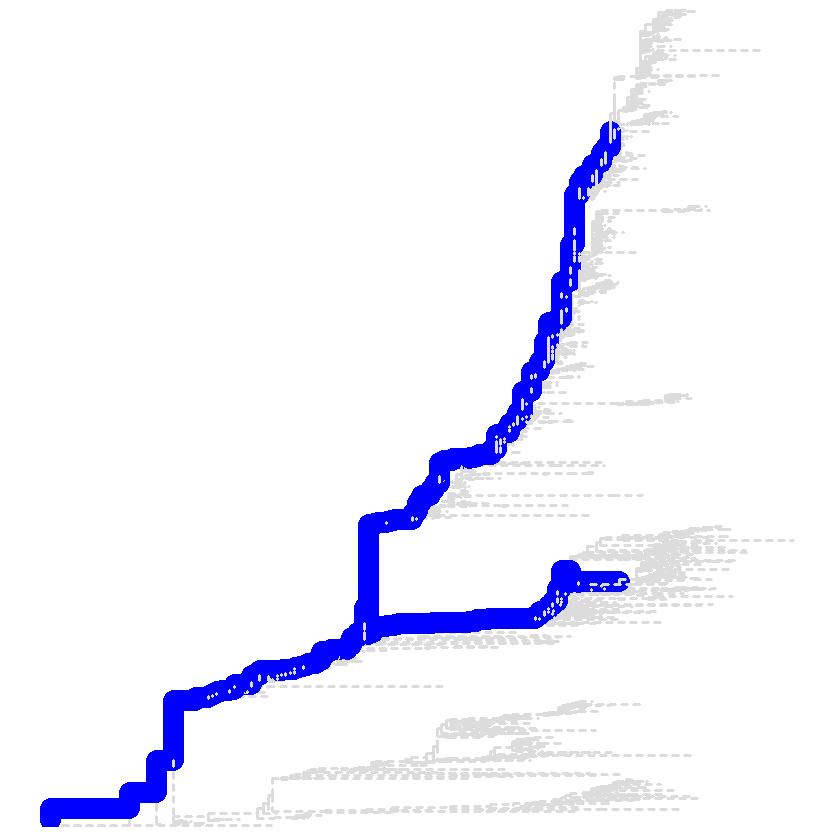

In [51]:
subPaths <- paths[2:3]

attr(tree, "group") <- rep(1, times = Ntip(tree) + tree$Nnode)
attr(tree, "group")[unique(unlist(subPaths))] <- 0
attr(tree, "group") <- factor(attr(tree, "group"))

attr(tree, "size") <- rep(0.01, times = Ntip(tree) + tree$Nnode)
attr(tree, "size")[unique(unlist(subPaths))] <- 3

p <- ggtree(tree, aes(color=group, linetype=group, size=size)) + 
    scale_color_manual(values = c("blue", "#DCDCDC")) + 
    theme(legend.position = "none")
p

In [52]:
ggsave(
    filename = file.path(PLOTS_DIR, "pathway1.svg"),
    plot = p, 
    device = "svg",
    width = 10,
    height = 12
)

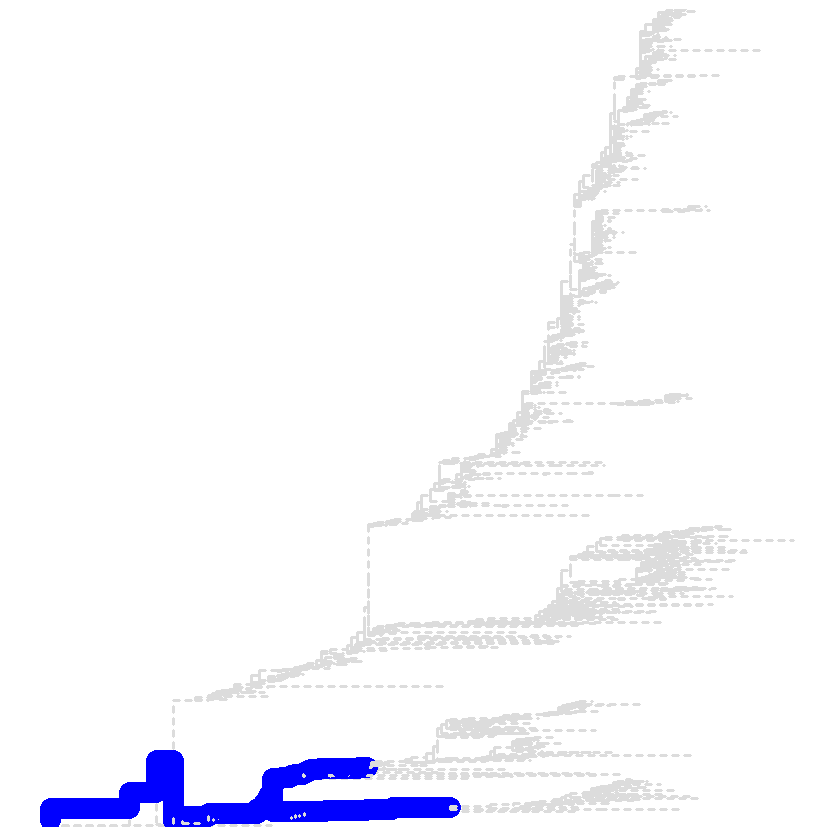

In [53]:
subPaths <- paths[c(1, 4)]

attr(tree, "group") <- rep(1, times = Ntip(tree) + tree$Nnode)
attr(tree, "group")[unique(unlist(subPaths))] <- 0
attr(tree, "group") <- factor(attr(tree, "group"))

attr(tree, "size") <- rep(0.01, times = Ntip(tree) + tree$Nnode)
attr(tree, "size")[unique(unlist(subPaths))] <- 3

p <- ggtree(tree, aes(color=group, linetype=group, size=size)) + 
    scale_color_manual(values = c("blue", "gainsboro")) + 
    theme(legend.position = "none")
p

In [54]:
ggsave(
    filename = file.path(PLOTS_DIR, "pathway2.svg"),
    plot = p, 
    device = "svg",
    width = 10,
    height = 12
)

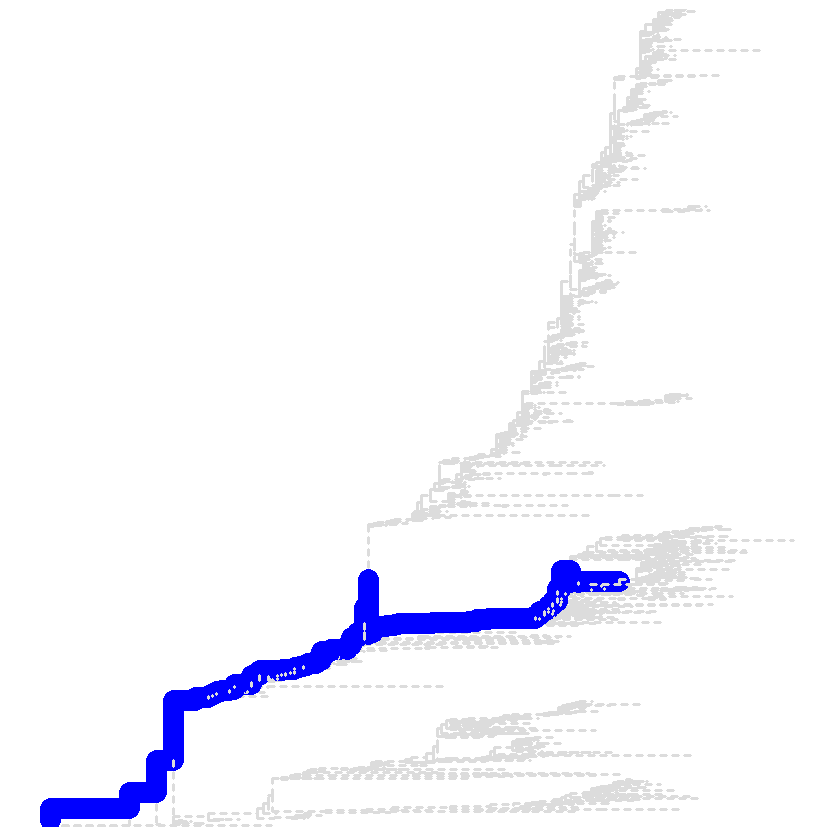

In [55]:
subPaths <- paths[2]

attr(tree, "group") <- rep(1, times = Ntip(tree) + tree$Nnode)
attr(tree, "group")[unique(unlist(subPaths))] <- 0
attr(tree, "group") <- factor(attr(tree, "group"))

attr(tree, "size") <- rep(0.01, times = Ntip(tree) + tree$Nnode)
attr(tree, "size")[unique(unlist(subPaths))] <- 3

p <- ggtree(tree, aes(color=group, linetype=group, size=size)) + 
    scale_color_manual(values = c("blue", "gainsboro")) + 
    theme(legend.position = "none")
p

In [56]:
ggsave(
    filename = file.path(PLOTS_DIR, "pathway3.svg"),
    plot = p, 
    device = "svg",
    width = 10,
    height = 12
)

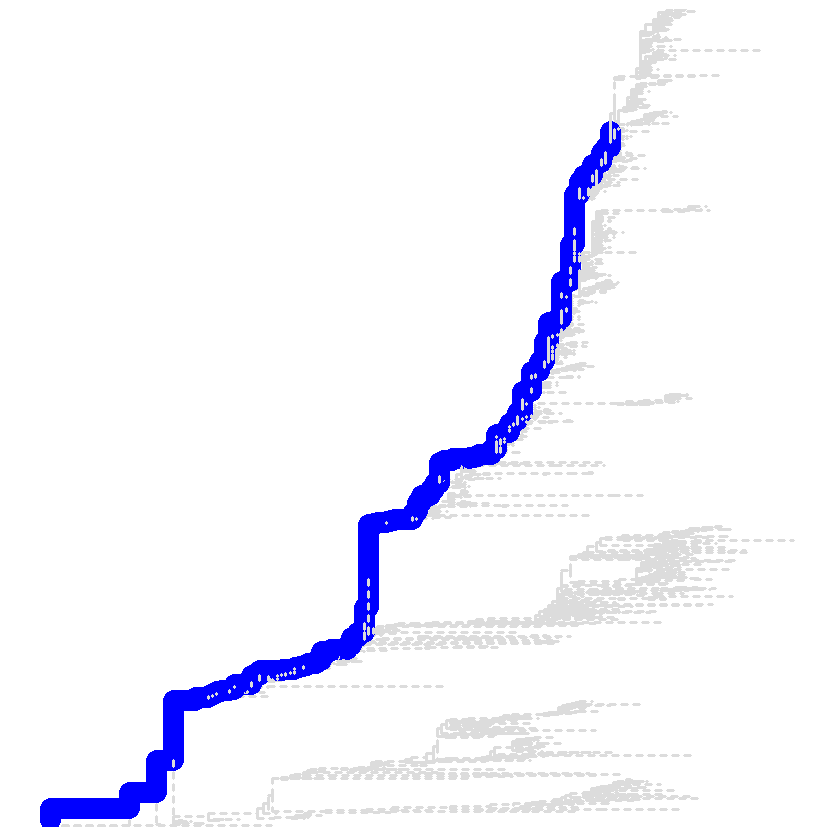

In [57]:
subPaths <- paths[3]

attr(tree, "group") <- rep(1, times = Ntip(tree) + tree$Nnode)
attr(tree, "group")[unique(unlist(subPaths))] <- 0
attr(tree, "group") <- factor(attr(tree, "group"))

attr(tree, "size") <- rep(0.01, times = Ntip(tree) + tree$Nnode)
attr(tree, "size")[unique(unlist(subPaths))] <- 3

p <- ggtree(tree, aes(color=group, linetype=group, size=size)) + 
    scale_color_manual(values = c("blue", "gainsboro")) + 
    theme(legend.position = "none")
p

In [58]:
ggsave(
    filename = file.path(PLOTS_DIR, "pathway4.svg"),
    plot = p, 
    device = "svg",
    width = 10,
    height = 12
)

In [59]:
mutations <- fixationSites(paths)

In [99]:
snpTracing <- as.phylo(mutations)

x <- as_tibble(snpTracing)

d <- as_tibble(t(vapply(
    X = attr(snpTracing, "edgeSNPs"),
    FUN = function (snp) {
        if (length(snp) == 0) {
            res <- NA_character_
        } else {
            res <- character()
            snpNum <- length(snp)
            for (i in seq_len(snpNum)) {
                res <- paste0(res, snp[i])
                if (i < snpNum) {
                    if (i %% 4 == 0) {
                        res <- paste0(res, ",\n")
                    } else {
                        res <- paste0(res, ", ")
                    }
                }
            }

        }
        res <- c(res, attr(snp, "edge")[2])
        names(res) <- c("SNPs", "node")
        return(res)
    }, 
    FUN.VALUE = c(character(1), integer(1))
)))

d[["node"]] <- as.integer(d[["node"]])

y <- full_join(x, d, by = "node")
tree <- as.treedata(y)

Warning message:
"Removed 19 rows containing missing values (geom_label_repel)."


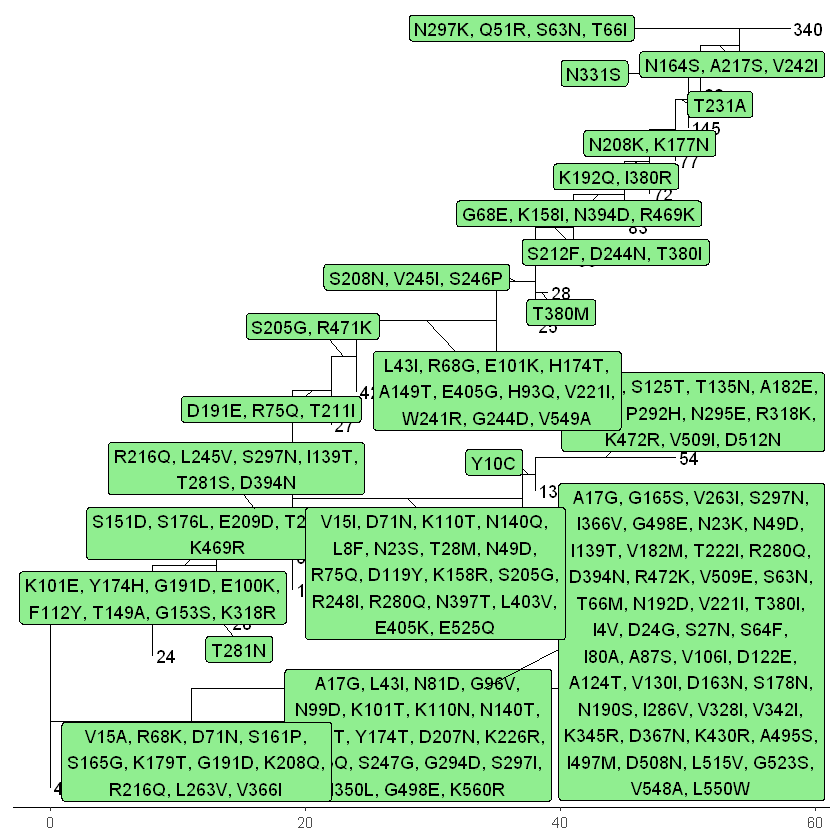

In [100]:
ggtree(tree) + geom_tiplab() +
    geom_label_repel(aes(x=branch, label=SNPs), fill='lightgreen', min.segment.length = 0) + theme_tree2()

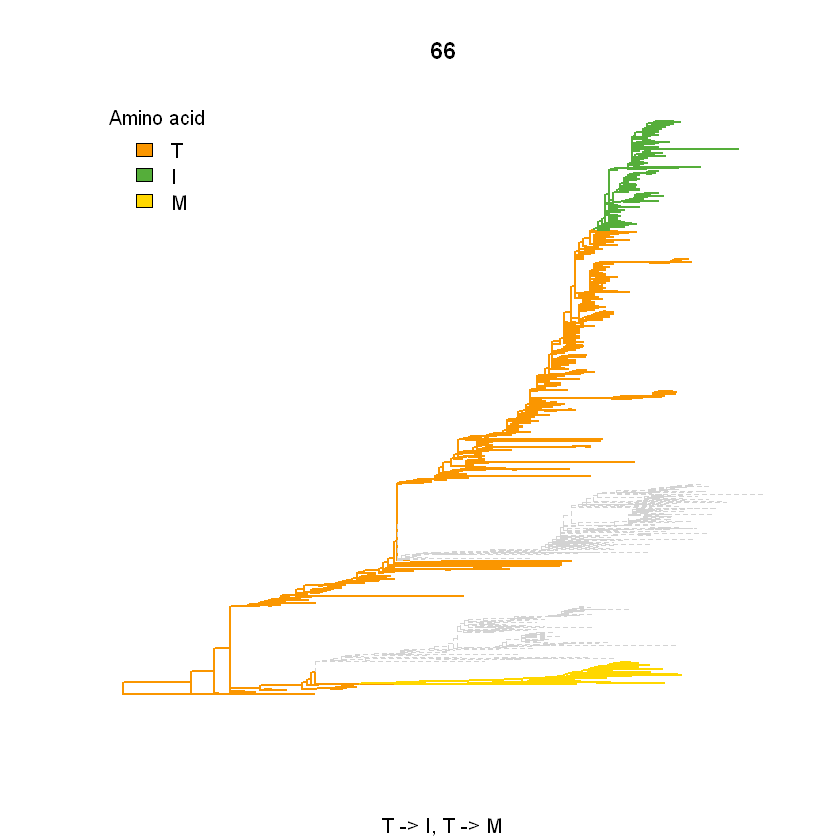

In [152]:
plotSingleSite(mutations, 66)

In [101]:
svg(filename = file.path(PLOTS_DIR, "singleFixation.svg"), width = 10, height = 12)
plotSingleSite(mutations, 212)
invisible(dev.off())

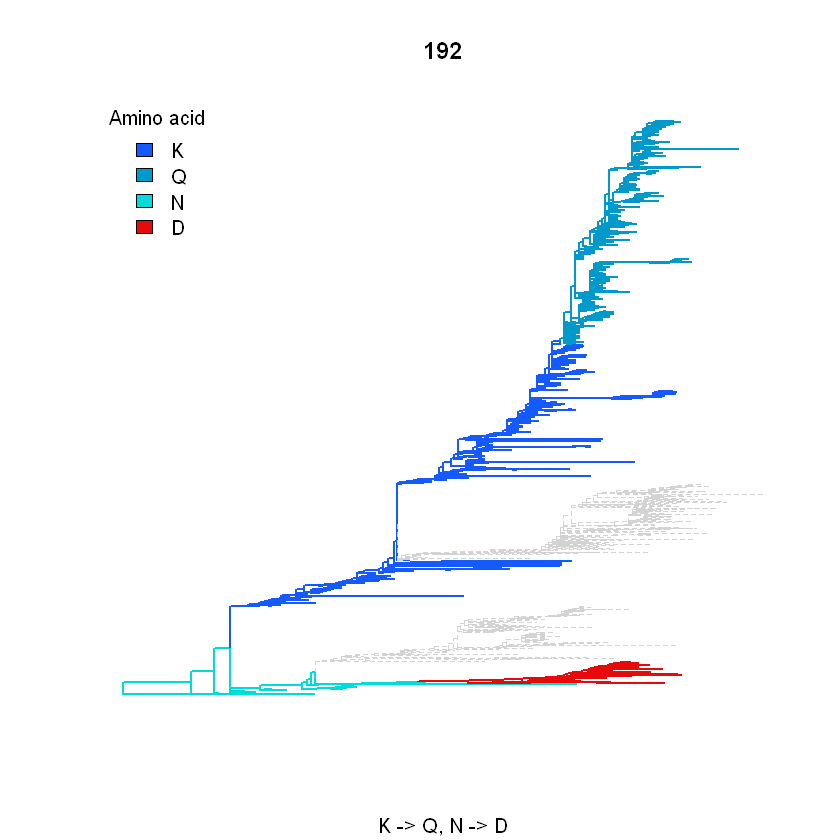

In [146]:
plotSingleSite(mutations, 192)

In [147]:
svg(filename = file.path(PLOTS_DIR, "multiFixation.svg"), width = 10, height = 12)
plotSingleSite(mutations, 192)
invisible(dev.off())